# **Newtonian Gravity Simulator**

This is a notebook for making simulations of particles attracted to each other due to Newtonian gravity. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Here we make a particle class and a simulation class.

Particle objects can .attract() each other and .update() their positional information based on these attractions and their current positional information.

The model for this simulation is Newton's law of gravitation:
\begin{equation*}
F = \frac{GMm}{r^2}
\end{equation*}
The forces acting on a particle at each time-step are calculated according to the masses and positions to each other particle at that time. The forces are calculated for every particle before updating their positions to avoid some particles lagging behind others.

In [39]:
class particle:
    
    def __init__(self, ID, x, y, xvel, yvel, xacc, yacc, mass, attraction_x, attraction_y, original_x, original_y):
        self.ID = ID
        self.original_x = original_x
        self.original_y = original_y
        self.x = x
        self.y = y
        self.xvel = xvel
        self.yvel = yvel
        self.mass = mass
        self.xacc = xacc
        self.yacc = yacc
        self.attraction_x = attraction_x
        self.attraction_y = attraction_y
        
    def attract(self, Q, G): # this makes the force between particles
        r = ((Q.x - self.x)**2 + (Q.y - self.y)**2)**0.5
        attraction_mag = (G*self.mass*Q.mass) / r**2
        direction_x = (Q.x - self.x)/r # making the unit vector pointing from current particle to the attracting particle
        direction_y = (Q.y - self.y)/r
        self.attraction_x = attraction_mag*direction_x # getting the components of the net force
        self.attraction_y = attraction_mag*direction_y
        
    def update(self, dt):
        self.x = self.x + dt*self.xvel + 0.5*self.xacc*(dt**2)
        self.y = self.y + dt*self.yvel + 0.5*self.xacc*(dt**2)
        self.xvel = self.xvel + self.xacc*dt
        self.yvel = self.yvel + self.yacc*dt
        


class Simulation:
    
    def __init__(self, dt, time_steps, G):
        self.dt = dt
        self.time_steps = time_steps
        self.G = G
        
    def run(self, time_steps, particle_list):
        x_track, y_track = np.empty([time_steps + 1, len(particle_list)]), np.empty([time_steps + 1, len(particle_list)])
        
        for t in np.arange(self.time_steps):
           
            for p in np.arange(len(particle_list)):
                P = particle_list[p]
                forces_x, forces_y = np.empty(len(particle_list)), np.empty(len(particle_list)) # recording all the attractions to other particles
                
                for q in np.arange(len(particle_list)):
                    Q = particle_list[q]
                    
                    if P.ID == Q.ID:
                        # dont be attracted to itself (avoids dividing by r**2=0)
                        forces_x[q], forces_y[q] = 0, 0
                    else:
                        P.attract(Q, self.G)
                        forces_x[q], forces_y[q] = P.attraction_x, P.attraction_y
                
                P.xacc, P.yacc = sum(forces_x)/P.mass, sum(forces_y)/P.mass # get acceleration from net force
            
            for p in np.arange(len(particle_list)):
                # update positions and velocities of all particles
                P = particle_list[p]
                P.update(dt = dt)
                # add new positions to the particle xtrack and ytrack vectors
                x_track[t + 1, p] = P.x
                y_track[t + 1, p] = P.y
        
        for p in np.arange(len(particle_list)):
            P = particle_list[p]
            x_track[0, p] = P.original_x
            y_track[0, p] = P.original_y
            
        
        return x_track, y_track

**Making particle objects**

Choose inital conditions for the particles. There are three at the moment, but you can add however many you want by adding to the arrays below.

In [40]:
xs = np.array([-1.5e+11, 1.5e+11, 8e+11])
ys = np.array([0, 0, 0])
xvels = np.array([10000, 0, 0])
yvels = np.array([-10000, 10000, 20000])
xaccs = np.array([0, 0, 0])
yaccs = np.array([0, 0, 0])
masses = np.array([1.9891e+30, 1.9891e+30, 7.3477e+22])
attractions_x = np.array([0, 0, 0])
attractions_y = np.array([0, 0, 0])

# making n particles from the arrays
particle_list = []
for n in np.arange(len(xs)):
    name = 'particle_' + str(n)
    globals()[name] = particle(name, xs[n], ys[n], xvels[n], yvels[n], xaccs[n], yaccs[n], masses[n], attractions_x[n], attractions_y[n], xs[n], ys[n])
    particle_list.append(globals()[name])

**Creeating and running a simulation**

Choose the gap between timesteps (dt), the number of timesteps (time_steps) and a value for gravitational constant (G). If G = 6.67408e-11, everything will be in SI units, but it doesn't have to be.

In [41]:
dt = 1000
time_steps = 100000
G = 6.67408e-11

sim = Simulation(dt, time_steps, G)
x_path, y_path = sim.run(sim.time_steps, particle_list) # collecting up the output



**Plotting the paths**

Here we get to see the paths the particles have taken. Two graphs are produced: one which shows numbers, axis and starting positions (actually useful), and one that is more aesthetically pleasing.

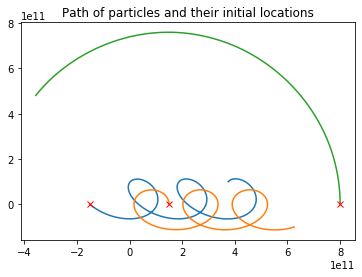

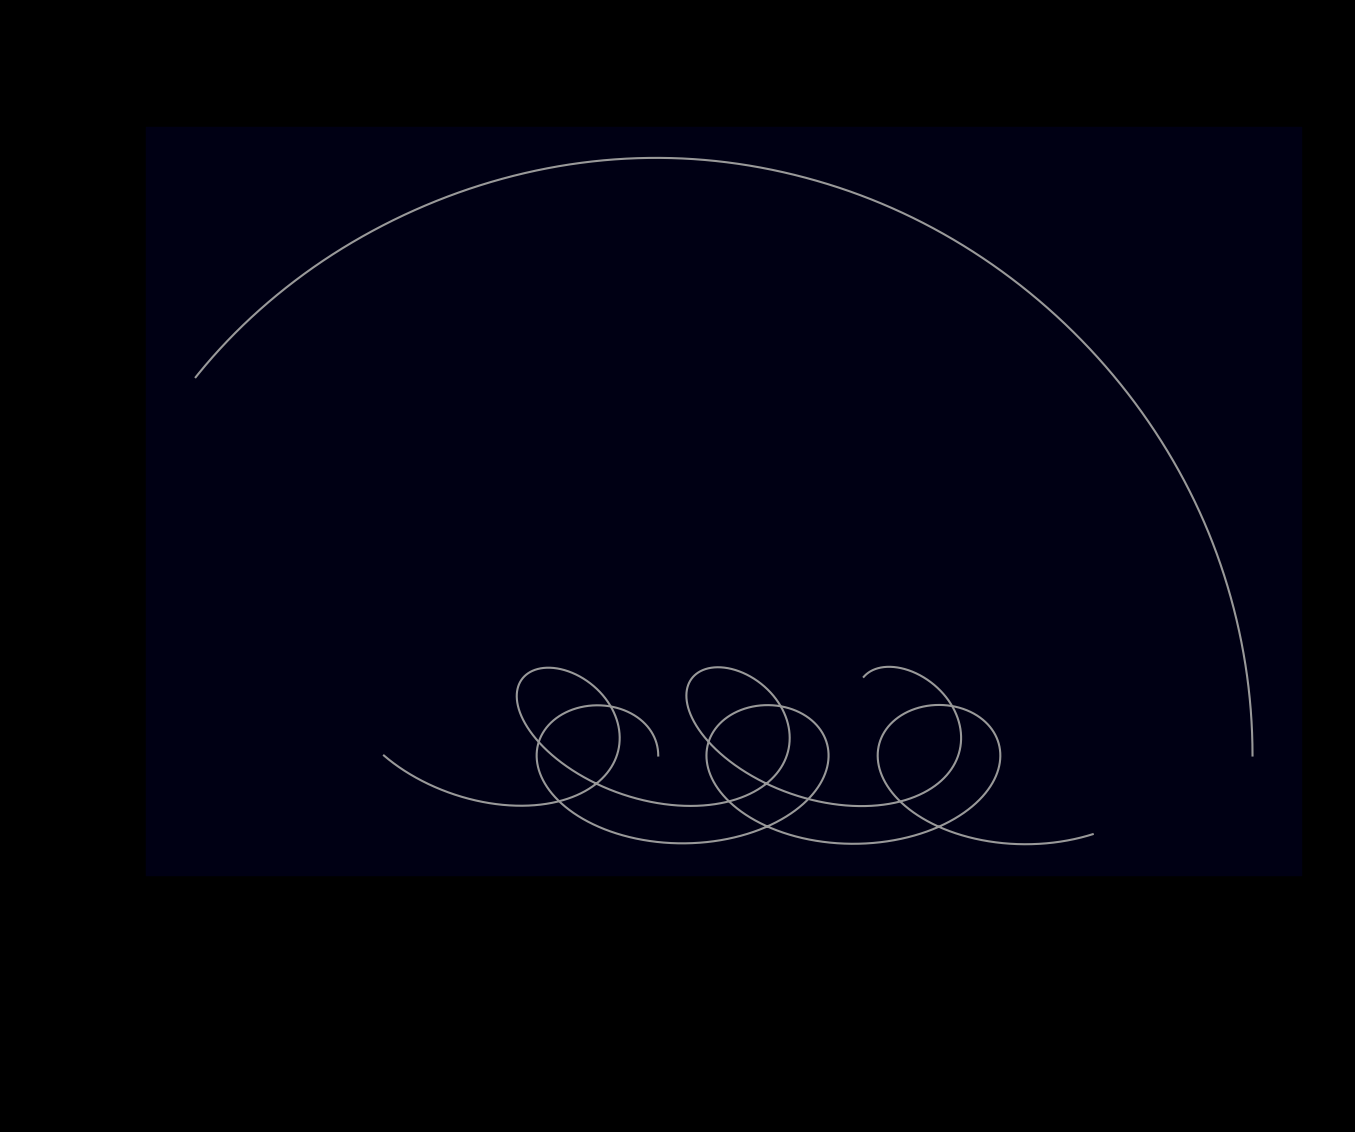

In [44]:
fig = plt.figure(1,facecolor=(1, 1, 1))
for n in np.arange(len(xs)):
    plt.plot(x_path[:, n], y_path[:, n], '-')
    plt.plot(x_path[0, n], y_path[0, n], 'xr')   
plt.title('Path of particles and their initial locations')
plt.show()


fig = plt.figure(figsize=(3, 2), dpi=500)
line_col = [0.6, 0.6, 0.6]
for n in np.arange(len(xs)):
    plt.plot(x_path[:, n], y_path[:, n], '-', color = line_col, linewidth=0.3)
    
ax = plt.gca()
colour = [0.00, 0.00, 0.08]
fig.patch.set_facecolor('black')
ax.set_facecolor((colour))
plt.savefig('sim_art_1.png')
plt.show()